### IDs:
Insert yours IDs to the cell below

ID #1: 207380528

ID #2: 302673355


In [16]:
import pandas as pd
import numpy as np
import scipy.stats as sc
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from google.colab import drive
from sklearn.datasets import load_boston
from scipy.stats import norm
from math import floor, ceil


#drive.mount('/content/drive')
sns.set_style("dark")
%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.7)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

**1. describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?**

In [17]:
boston_dataset = load_boston()

X = boston_dataset.data
columns = list(boston_dataset.feature_names)
X = pd.DataFrame(X, columns=columns)

y = boston_dataset.target
df = pd.DataFrame(np.concatenate((X, y[:, np.newaxis]), axis=1), columns=columns+['PRICE'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [18]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
143,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9
413,28.65580,0.0,18.10,0.0,0.597,5.155,100.0,1.5894,24.0,666.0,20.2,210.97,20.08,16.3
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2
292,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70,27.9


In [19]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
print(f"Number of samples: {len(X)}\n"
      f"Number of features: {len(X.columns)}")

Number of samples: 506
Number of features: 13


Features Data Types:

In [21]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

**2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.**

Text(0.5, 1.0, 'Nitric Oxides Concentration Histogram')

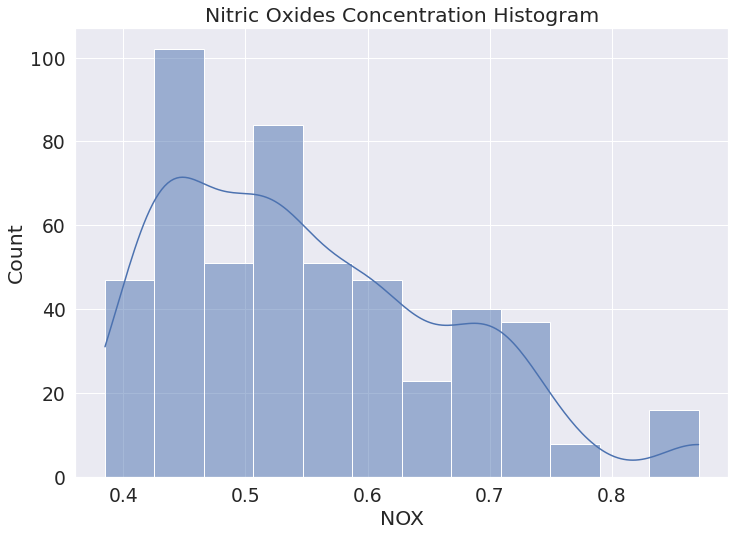

In [22]:

sns.histplot(df.NOX, kde=True)
plt.title("nitric oxides concentration histogram".title())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Nitric Oxides Concentration Boxplot')

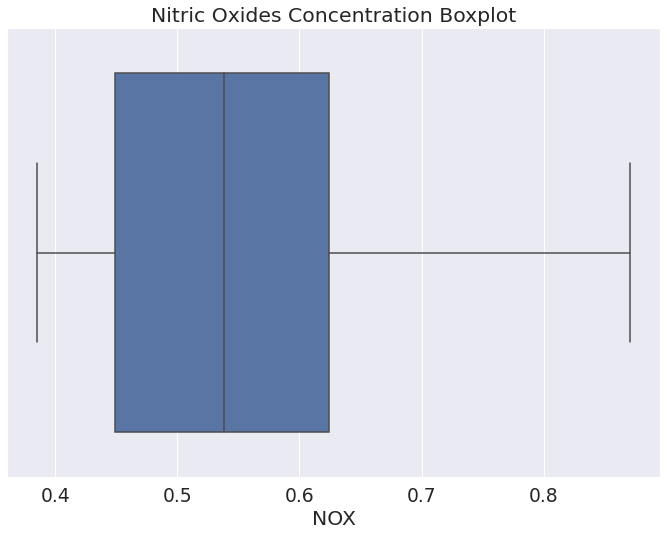

In [23]:
sns.boxplot(df.NOX)
plt.title("nitric oxides concentration boxplot".title())

First of all, this feature represents nitric oxides concentration (parts per 10 million). </br> The distibution seems to have a realtively long right tail, we see that in both the plots.  Also, we can see that most of the value are  approx between 0.45-0.63. Perhaps it is a log-normal distribution, not a problem to check. Let's check: 

Text(0.5, 1.0, 'Log Of Nitric Oxides Concentration Histogram')

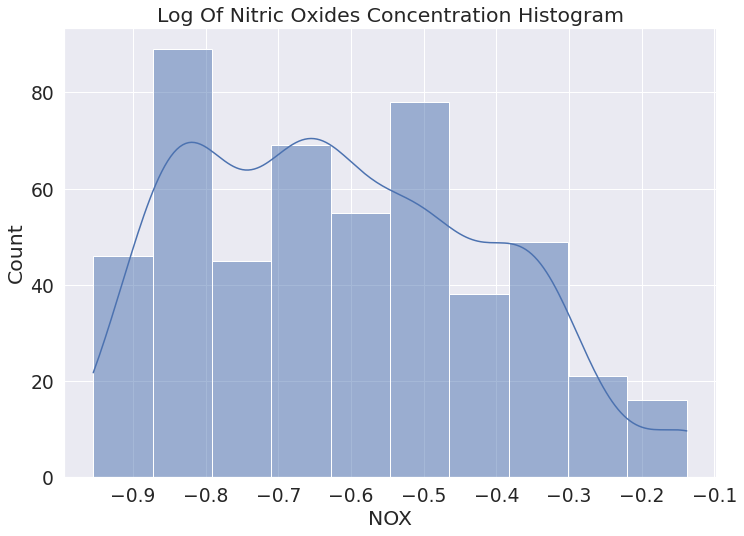

In [24]:
sns.histplot(np.log(df.NOX), kde=True)
plt.title("LOG of nitric oxides concentration histogram".title())

It doesn't seem to fit a normal distribution quite well also.

**3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?**

Text(0.5, 1.0, 'Correlation Matrix')

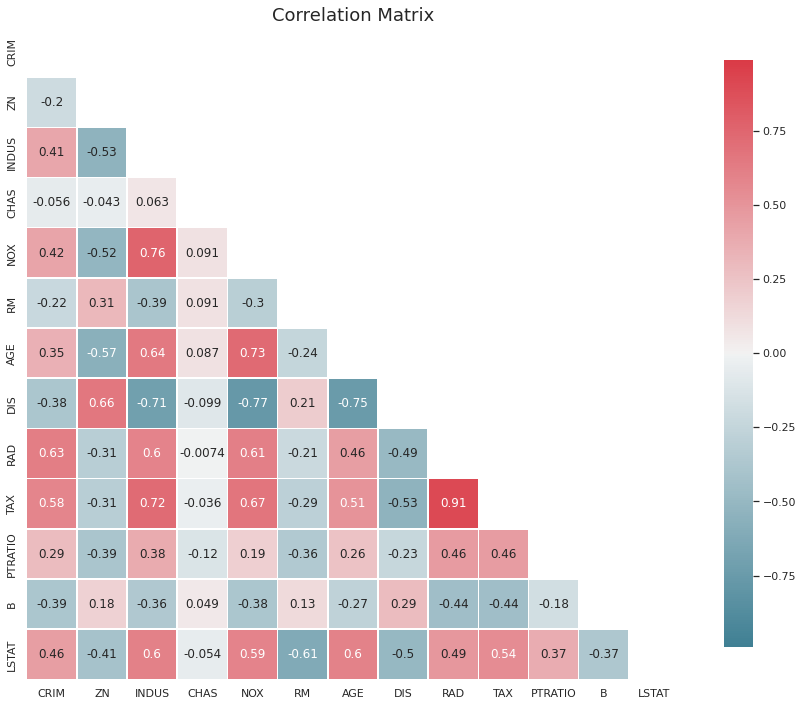

In [25]:
sns.set(style="white")

corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.99, vmin=-0.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9}, annot=True)
plt.title("Correlation Matrix", fontsize=18)

Look for strong red/blue cells for strong absolute correlations. </br>
</br>
TAX and RAD are strongly positively correlated. </br>
NOX is strongly correlated with INDUS, AGE and negatively correlated with DIS. </br>
AGE and DIS are negatively correlated. </br>
DIS and INUS are negatvely correlated. <br> 
</br>
In addition, looking at the CHAS, a dummy variable measuring proximity to the Charles river, it's unlike the rest of the features as it is very uncorrlerated with all the other features.

In [26]:
# reset the seaborn
sns.set_style("dark")
%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.7)

**4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot).**

In [27]:
unstacked = corr.unstack()
sorted_abs_corr = unstacked.abs().sort_values(ascending=False)
sorted_abs_corr = sorted_abs_corr[sorted_abs_corr != 1.0]
pair1 = np.array(sorted_abs_corr.index[0]).reshape(1, 2)
pair2 = np.array(sorted_abs_corr.index[2]).reshape(1, 2)
pairs = np.concatenate((pair1, pair2))
print(f"The pairs are: \n {pairs}")

The pairs are: 
 [['RAD' 'TAX']
 ['DIS' 'NOX']]


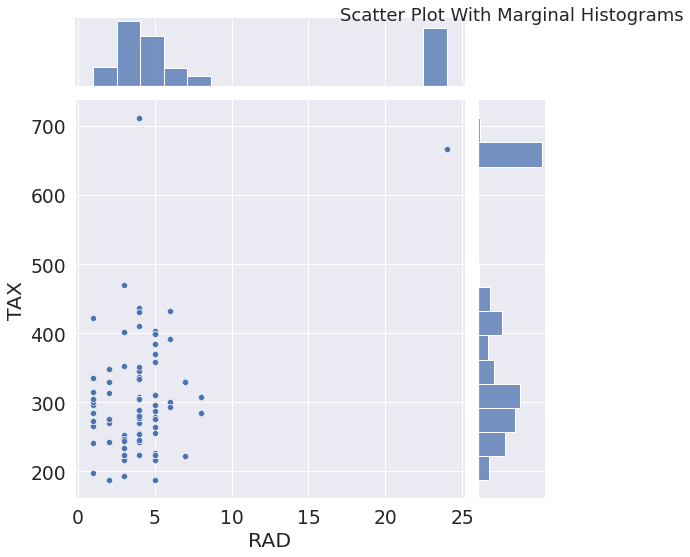

In [28]:
x = pair1[0][0]
y = pair1[0][1]


sns.jointplot(x=x, 
              y=y,
             edgecolor="white",
             data=df, 
             height=8,
             marginal_kws=dict(bins=15)
);
plt.title(f"Scatter Plot with Marginal Histograms".title(), size=18, pad=80)
plt.show()


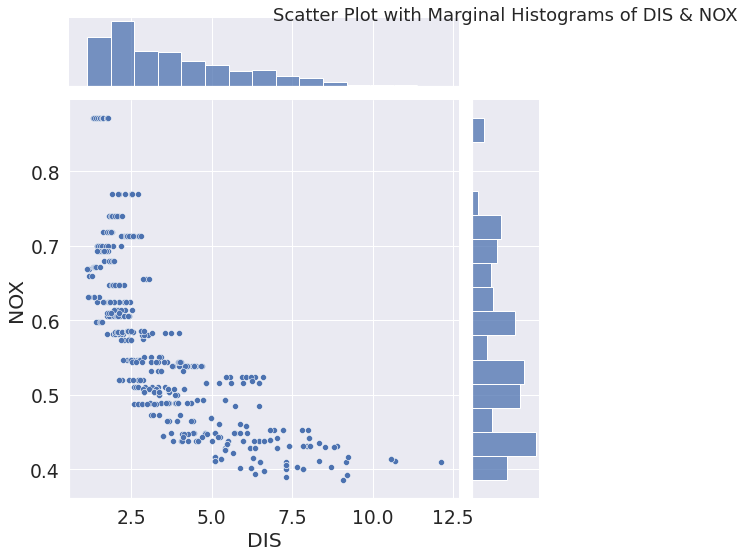

In [29]:
x = pair2[0][0]
y = pair2[0][1]

sns.jointplot(x=x, 
              y=y,
             edgecolor="white",
             data=df, 
             height=8,
             marginal_kws=dict(bins=15),
              );
plt.title(f"Scatter Plot with Marginal Histograms of {x} & {y}", size=18, pad=80)
plt.show()


**5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)**

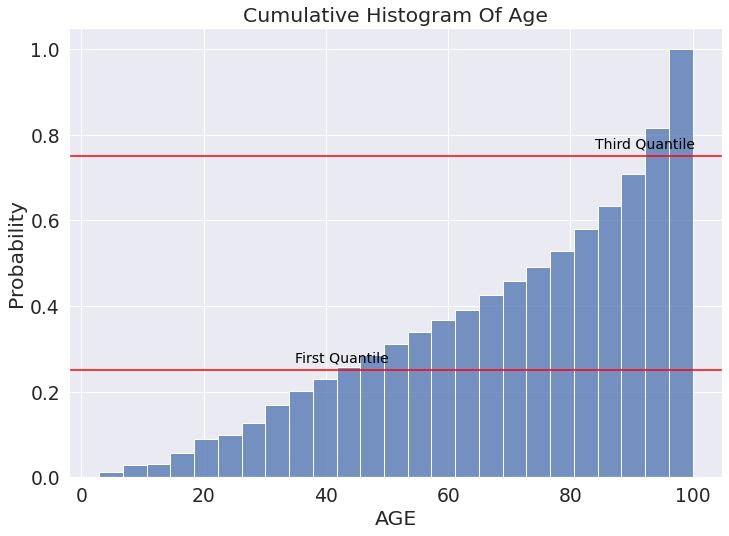

In [30]:
f, ax = plt.subplots(1)
# Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)

sns.histplot(df.AGE, cumulative=True, bins=25, stat='probability')
x_first_quantile = df.AGE.quantile(q=0.25, interpolation='nearest')
x_third_quantile = df.AGE.quantile(q=0.75, interpolation='nearest')

ax.annotate("First Quantile", xy=(x_first_quantile - 10, 0.25 + 0.02), color='black', fontsize=14)
ax.axhline(y=0.25, color='red')
ax.annotate("Third Quantile", xy=(x_third_quantile - 10, 0.75 + 0.02), color='black', fontsize=14)
ax.axhline(y=0.75, color='red')

plt.title("cumulative histogram of age".title())
plt.show()

**6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point.**

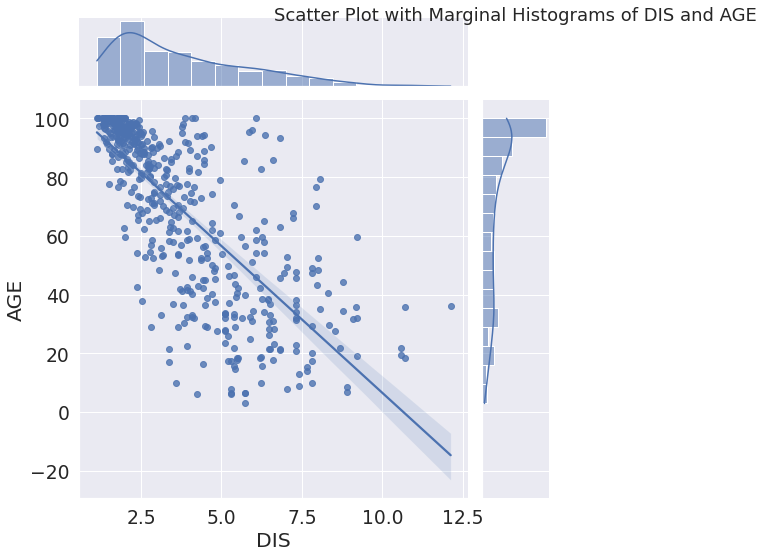

In [31]:
sns.jointplot(x=df.DIS, 
              y=df.AGE,
              height=8,
              kind="reg",
              marginal_kws=dict(bins=15),
              data=df);

plt.title(f"Scatter Plot with Marginal Histograms of DIS and AGE", size=18, pad=80)
plt.show()


AGE: proportion of owner-occupied units built prior to 1940. </br>
DIS: weighted distances to ﬁve Boston employment centers. </br>
</br>
**Old buildings tend to be closer to employment centers.**

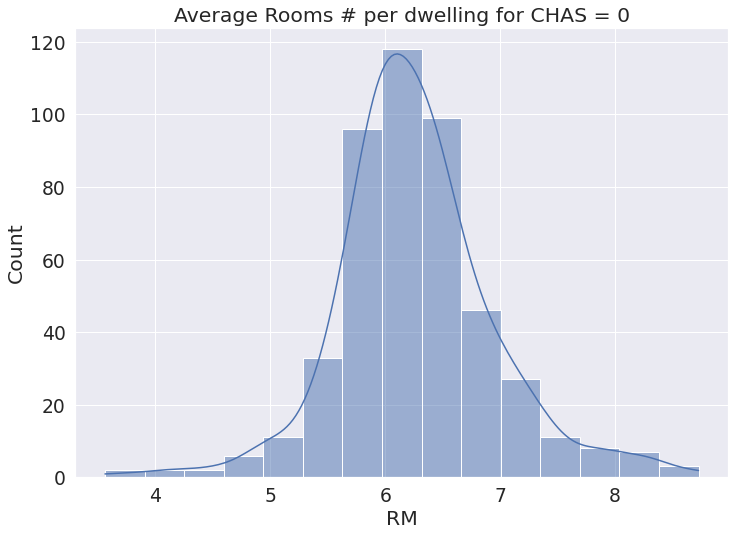

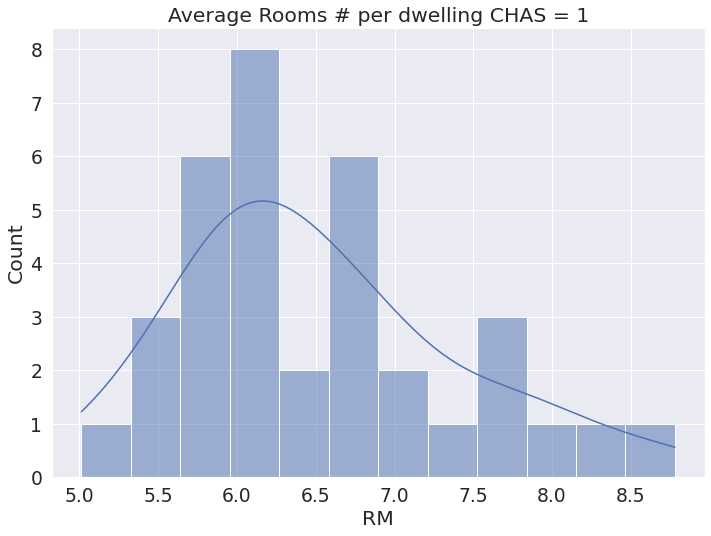

In [32]:
sns.histplot(df[df.CHAS == 0].RM, bins=15, kde=True)
plt.title("Average Rooms # per dwelling for CHAS = 0")
plt.show()

print("\n"* 3)
sns.histplot(df[df.CHAS == 1].RM, bins=12, kde=True)
plt.title("Average Rooms # per dwelling CHAS = 1")
plt.show()

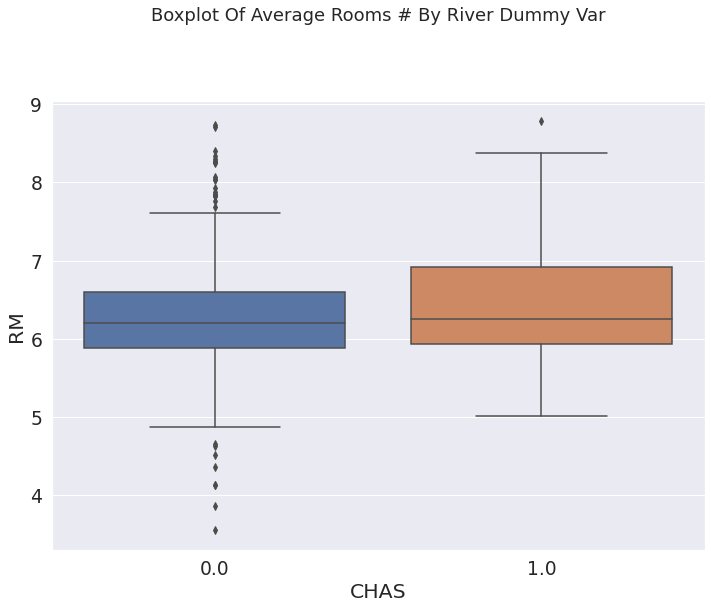

In [33]:
sns.boxplot(y=df.RM, 
            x=df.CHAS,
            data=df);

plt.title(f"Boxplot of Average Rooms # by river dummy var".title(), size=18, pad=80)
plt.show()

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). </br> 
RM: average number of rooms per dwelling. </br> 
</br> 
**Although there is a relatively small number of rows for CHAS = 1, it seems that the distibution of the Average Rooms number is different, while at towns without river the distibution looks quite normal, it doesn't for towns with river. The IQR is much bigger for towns with river as well.**

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=2$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

#### Answer

$P(X,Y,Z) = P(X|Y,Z)·P(Y|Z)·P(Z)$

As each of the three variables has two possible outcomes, there are $m\cdot n\cdot 2$ different parameters to the joint distribution. However, since the different probabilities must sum to 1, one of the parameters is redundent, hence there are $m\cdot n\cdot 2-1$ different parameters that define the joint distribution.

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

#### Answer

Given that $X$, $Y$ and $Z$ are independent we'd only need to know the different outcomes that each distribution can receive to define the distribution. In opposite to the previous question, since $X$, $Y$ and $Z$ are independent, we know that $P(X=x \cap Y=y \cap Z=z) = P(X=x)·P(Y=y)·P(Z=z)$.<br>
Meaning, given $P(X=x)$, $P(Y=y)$, $P(Z=z)$, we know the shared event's probabilty. Therefore, we now need only $m+n+2$ parameters to define the joint distribution.

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

#### Answer

Given $X$ and $Y$ are conditionaly independent given $Z$, we know that $P(X=x \cap Y=y| Z=z) = P(X=x|Z=z)·P(Y=y|Z=z)$. <br>
To define the joint probabilty of $X$ and $Z$, since we don't know if they are their dependence relations, we need $n·2-1$ different parameters. In an analogous manner, we need $m·2-1$ parameters to define $Y$ and $Z$'s joint distribution. <br>
In addition, given the conditional independence, we need $n·2-1+m·2-1=2m+2n-2$ parameters to define the joint distribution.

#### 2.D
Give an example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are NOT conditionally independent given $Z$, but $X$ and $Y$ are (unconditionally) independent.

Where $X$ and $Y$ are standard normal distribution ($N(0, 1)$).

#### Answer </br>

We are looking for $X, Y$ and $Z$ which will hold </br> 
$P(X=x\cap Y=y)=P(X=x)·P(Y=y)$ **AND** $P(X=x\cap Y=y|Z=z) \ne P((X=x)|Z=z)·P((Y=y)|Z=z) $   <br>

Let's define $X$ and $Y$ to be independent standart normal RVs and $Z = 1$ if ($x > σ$  AND $y > σ$) OR ($x < σ$  AND $y < σ$) else $0$. <br>
Since we define $X$ and $Y$ to be independent, the first equation holds. Meaning, knowing $X=x$ does not give us any information regarding the $Y$. <br> However, given $Z=1$, the probability <br>$P((X>x|x=σ) \cap (Y<y|y=σ)) = 0 \neq P(X>x|x=σ) · P(Y<y|y=σ)$. <br>
Hence, $X$ and $Y$ are dependent given $Z$, and the second equation holds.


### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

In [34]:
gmd_df = pd.read_csv("drive/MyDrive/Master's/Statistic & Data Analytics/Exercises/EX2/GMD_2021.csv", names=('index', 'col1'), index_col=0)

gmd_df.sample(5)

,col1
index,
672,13.462143
219,9.239443
438,14.186480
536,16.083950
585,17.392391


Let's first plot a histogram for the data, for ourselfs:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02ead37d10>]],
      dtype=object)

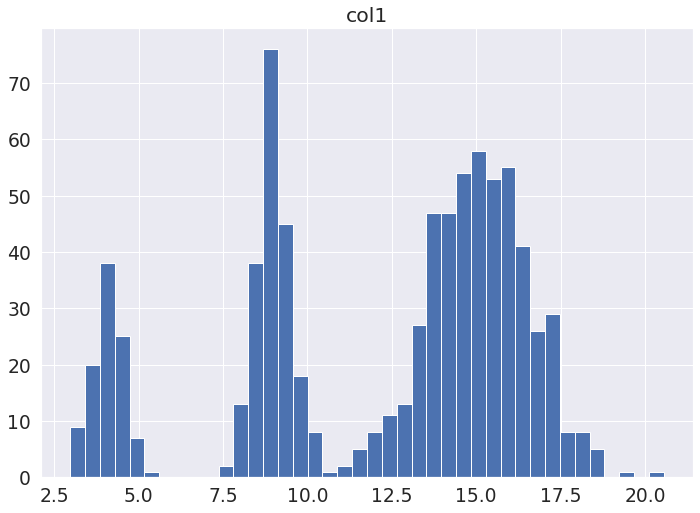

In [35]:
gmd_df.hist(bins=40)

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

We need to find $\mu_{3}$, $w_1$, $w_3$

**Option #1**

Using EM algorithm

In [36]:

gmm = GaussianMixture(n_components=3, means_init=[[4], [9], [15]], covariance_type='full').fit(gmd_df)
# 4, 9 initializations are given, 15 is a good guess from looking at the data. 
# another option (less accurate) would be to put np.mean(gmd_df.col1)

print(f"Converged: {gmm.converged_}")
for i, mean, cov, weight in zip(range(1, 4), gmm.means_, gmm.covariances_, gmm.weights_):
  print(f"For Gauusian # {i}: mean={round(mean[0], 3)}, std={cov[0][0]}, weight={round(weight, 3)}")



Converged: True
For Gauusian # 1: mean=4.084, std=0.21976395599787132, weight=0.125
For Gauusian # 2: mean=8.998, std=0.27653105887548335, weight=0.25
For Gauusian # 3: mean=15.104, std=2.249650902916538, weight=0.625


**Option #2**

Using logic to get the Mean, and thresholds between the distibutions to get the weights.

In [37]:
# We'll set mu3 = 15, so:
mu = np.array([4, 9, 15])
sigma = np.array([0.5, 0.5, 1.5])

threshold_1_to_2 = 6.5 # lower than this is gauusian1
# between these is gauusian2
threshold_2_to_3 = 11 # higher than this is gauusian3

col1 = gmd_df.col1
# splitting to 3 gauusians
gauusian1 = col1[col1 < threshold_1_to_2]
gauusian2 = col1[(col1 > threshold_1_to_2 )& (col1 < threshold_2_to_3)]
gauusian3 = col1[col1 > threshold_1_to_2]

gauusians = [gauusian1, gauusian2, gauusian3]

# calculate the statisitcs for each distibution
stds= [np.std(g) for g in gauusians]
means= [np.mean(g) for g in gauusians]
lent = len(gmd_df)
weights= [len(g) / lent for g in gauusians]


for i, mean, std, weight in zip(range(1, 4), means, stds, weights):
  print(f"For Gauusian # {i}: mean={mean:.2f}, std={std:.2f}, weight={weight:.2f}")




For Gauusian # 1: mean=4.08, std=0.47, weight=0.12
For Gauusian # 2: mean=9.01, std=0.55, weight=0.25
For Gauusian # 3: mean=13.36, std=3.05, weight=0.88


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

In [38]:
TOTAL_SAMPLES = 10000

gauss_1 = np.random.normal(loc=gmm.means_[0], 
                           scale=gmm.covariances_[0].item(), 
                           size=round(TOTAL_SAMPLES * gmm.weights_[0])) 

gauss_2 = np.random.normal(loc=gmm.means_[1], 
                           scale=gmm.covariances_[1].item(), 
                           size=round(TOTAL_SAMPLES * gmm.weights_[1]))

gauss_3 = np.random.normal(loc=gmm.means_[2],
                           scale=gmm.covariances_[2].item(), 
                           size=round(TOTAL_SAMPLES * gmm.weights_[2]))

concat_gmm = np.concatenate((gauss_1, gauss_2, gauss_3))
concat_gmm.shape

(10000,)

In [39]:
statistics_df = pd.DataFrame({"mu": gmm.means_.flatten(), "sigma": gmm.covariances_.flatten()})

# if we take 4 stds from the mean for each distibution, and take the 
# lowest/highest values, we'll have almost 100% of the data.
statistics_df["mu_plus_4_sigma"] = statistics_df.mu + 4 * statistics_df.sigma
statistics_df["mu_minus_4_sigma"] = statistics_df.mu - 4 * statistics_df.sigma

statistics_df

,mu,sigma,mu_plus_4_sigma,mu_minus_4_sigma
0,4.083811,0.219764,4.962866,3.204755
1,8.998182,0.276531,10.104306,7.892057
2,15.103640,2.249651,24.102244,6.105037


In [40]:
min_x = min(statistics_df.mu_minus_4_sigma)
max_x = max(statistics_df.mu_plus_4_sigma)
min_x, max_x

(3.204754784084552, 24.102243724609963)

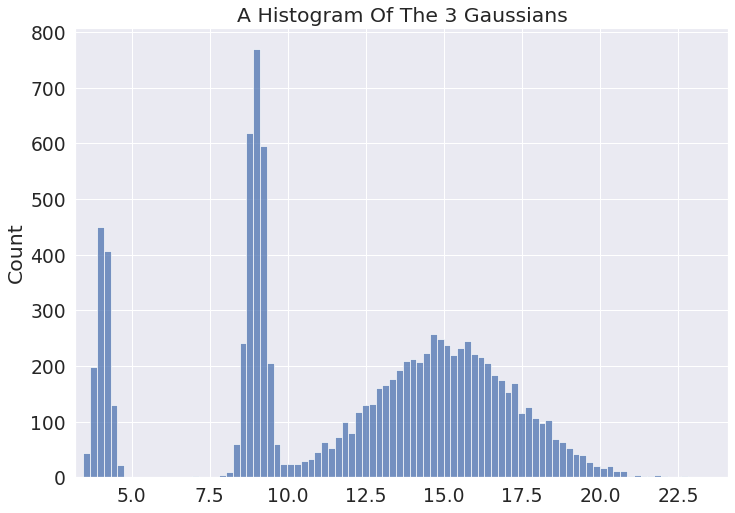

In [41]:


sns.histplot(concat_gmm, bins=90)
plt.title("A histogram of the 3 gaussians".title())

plt.xlim(min_x, max_x)
plt.show()


#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

Answer: 

We won't be able to esitmate in both ways. using EM we would be able to estimate the parameters using k = 4. However, using the eye test will not be possible becuase there aren't 4 clear distibutions in the data, as opposed to 3, when we see clearly 3 distibutions.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

Way #1


*   Create 3 different Gaussians, with the corresponding parameters.
*   Sample each distibution 33% of TOTAL_SAMPLES (which we can define to any positive integer

*   Concatenate all the samples (which are arrays/lists).
*   That's it.






Way #2


*   Create 3 different Gaussians, with the corresponding parameters.
*   Sample from each gaussian randomly (since the weights are equal, it's like choosing one randomly), TOTAL_SAMPLES times

*   That's it.

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


**Way #1**

In [42]:

TOTAL_SAMPLES = 1000

gauss_1 = np.random.normal(loc=3, scale=1, size=floor(TOTAL_SAMPLES/3)) 
gauss_2 = np.random.normal(loc=7, scale=1, size=floor(TOTAL_SAMPLES/3))
gauss_3 = np.random.normal(loc=10, scale=1, size=ceil(TOTAL_SAMPLES/3))

concat_gmm = np.concatenate((gauss_1, gauss_2, gauss_3))
concat_gmm.shape

(1000,)

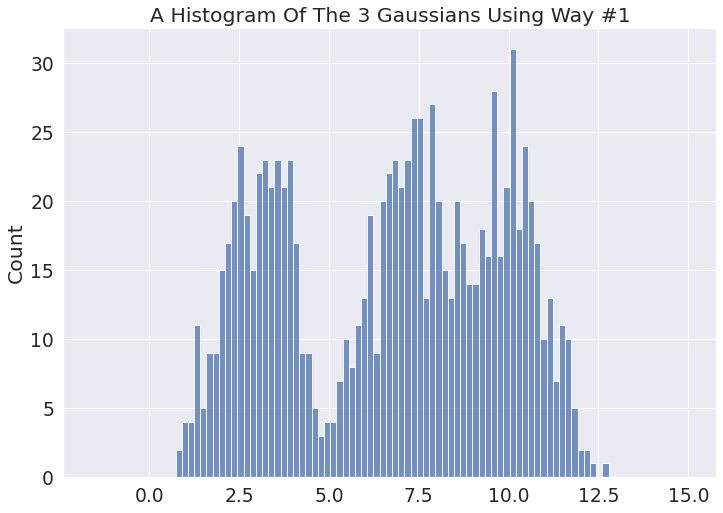

In [43]:
mean = np.mean(concat_gmm)
std = np.std(concat_gmm)

sns.histplot(concat_gmm, bins=70)
plt.title("A histogram of the 3 gaussians using way #1".title())
# same way as before for xlim
plt.xlim(mean-3*std, mean+3*std)
plt.show()


#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

**Way #2**

In [44]:
TOTAL_SAMPLES = 1000

mu  = np.array([3, 7, 10])
sigma = 1. # all the sigmas are 1

concat_gmm1 = [np.random.normal(loc=np.random.choice(mu), scale=sigma) for sample in range(TOTAL_SAMPLES)]



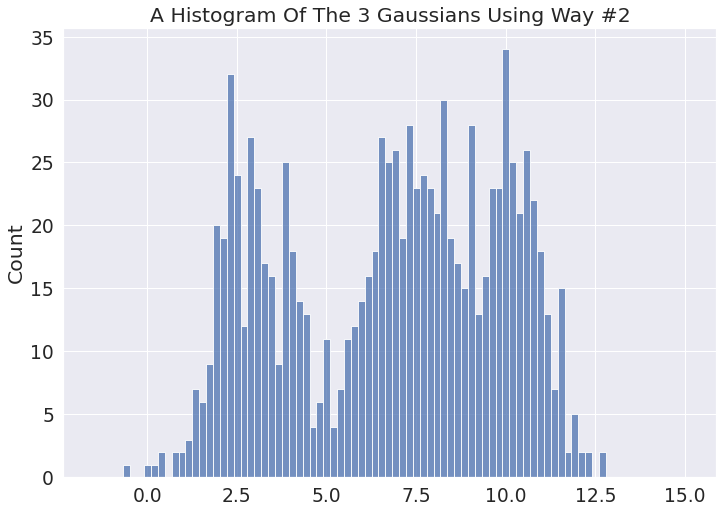

In [45]:
mean = np.mean(concat_gmm1)
std = np.std(concat_gmm1)

sns.histplot(concat_gmm1, bins=70)
plt.title("A histogram of the 3 gaussians using way #2".title())
# same way as before for xlim
plt.xlim(mean-3*std, mean+3*std)
plt.show()

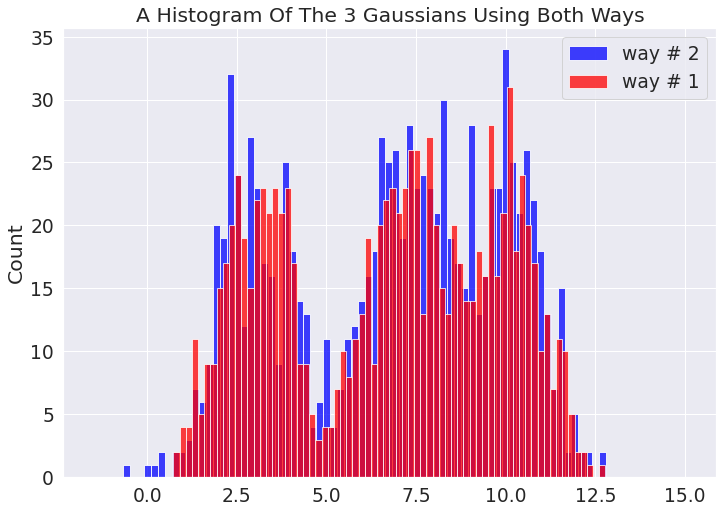

In [46]:
sns.histplot(concat_gmm1, bins=70, color='blue', multiple='dodge', label="way # 2")

sns.histplot(concat_gmm, bins=70, color='red', label="way # 1")

plt.legend()
plt.title("A histogram of the 3 gaussians using both ways".title())
# same way as before for xlim
plt.xlim(mean-3*std, mean+3*std)
plt.show()

Strong red means intersection. Seems about right.

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

**First, let's create the distribution and plot a histogram**

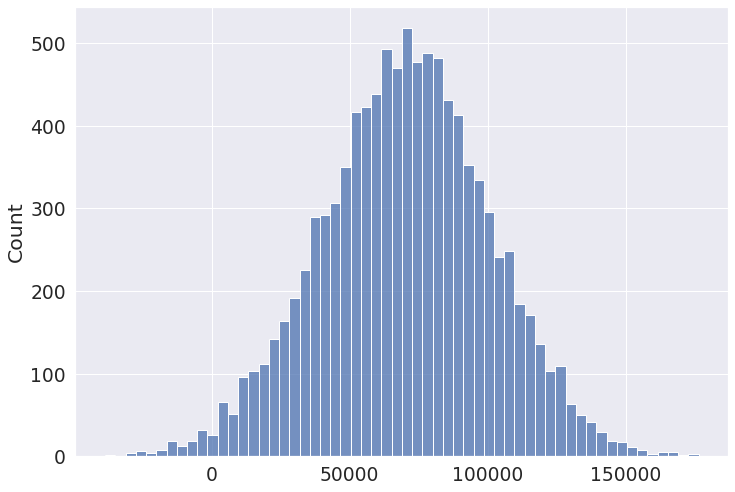

In [47]:

salaries = sc.norm(loc=70000, scale=30000)


# that's just for us, to visulize:
salaries_np = np.random.normal(loc=70000, scale=30000, size=10000) 

sns.histplot(salaries_np)

#### 4.A
What percent of people earn less than 50,000 RCU?

In [48]:
print(f"{round(salaries.cdf(50000), 3)*100}% earn less than 50000 RCU")

25.2% earn less than 50000 RCU


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [49]:
print(f"{round(salaries.cdf(65000) - salaries.cdf(45000), 3)*100}% earn between 45,000 RCU and 65,000 RCU")

23.1% earn between 45,000 RCU and 65,000 RCU


#### 4.C
What percent of people earn more than 70,000 RCU?

In [50]:
print(f"{(1 - round(salaries.cdf(70000), 3))*100}% earn more than 70,000 RCU")

50.0% earn more than 70,000 RCU


Makes sense since the mean is exactly 70000...

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [51]:
print(f"We expect {round((1 - salaries.cdf(140000))*1000)} employees to earn more than 140,000 RCU")

We expect 10 employees to earn more than 140,000 RCU


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

### Answer

The expected value of the coupon collector if the sum of the expected value of each of the geomertric RVs that constitute the $T_N=Σ_{i=1}^{n}X_i$, where $X_i$~ $Geometric(\frac{n+i-1}{n})$ </br> 
The numerator in each of these geometrics success is 1 lower than the previous one, as in the first trial we are certain to see a coupon we hadn't seen before, in the second trial $p=\frac{n-1}{n}$ and so on. </br>
The expectation of the joint event is the sum of all of the events' excpection, meaning $E(T_N)=E(X_1)+E(X_2)+...+E(X_n)=\frac{1}{p_1}+\frac{1}{p_2}+...+\frac{1}{p_n}$.

In [52]:
def calc_p(i, n):
  return ((n-i+1)/n)


def calc_expectation(n):
  expectation = 0
  for i in range(1,n+1):
    x_i = sc.geom(calc_p(i,n))
    expectation += x_i.expect()
  return expectation

#### 5.B
Write code to compute the exact value of $V(T_{N})$

### Answer

Given the previously calculate $p$ of each of the gemoetrics, we can calculate directly each $X_i$'s variance. Next, as $V(T_N) = Σ_{i=1}^{n}\frac{1-p_i}{p^2_i}$, we should just sum individual variances together:

In [53]:
def calc_var(n):
  var = 0
  expectation = 0
  for i in range(1,n+1):
    x_i = sc.geom(calc_p(i,n))
    var += x_i.var()
  return var

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

In [54]:
def calc_exact(n,k):
  all_p = [calc_p(i, n) for i in range(1, n+1)]
  all_k = [i for i in range(1, k-n+1)]
  if not all_k:
    print('The number of trials inserted is lower than the num of coupons.')
  p_1 = sc.geom.pmf(all_k, all_p[0])
  for p in all_p[1:]:
    p_i = sc.geom.pmf(all_k, p)
    p_1 = np.convolve(p_i, p_1)
  return 1 - p_1[:k-n+1].sum()

In [55]:
print(f'The exact P for N=30 and K=60 is {calc_exact(30,60):.3f}')

The exact P for N=30 and K=60 is 0.994


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results


### Answer

Chebicheff's upper bound is formulated as $P(T\geq E(T)+ λ) \leq \frac{V(T)}{λ^2}$. However, in this case we are interested in a lower bound, as the upper bound calculates the probabily of a negative number being smaller than an absolute number, since $60-μ < 0$. Therefore, we need to substract the bound from 1:

In [56]:
def chebyshev_lower_bound(mu, v, value):
  constant = value - mu
  return 1 - v /(constant ** 2)


In [57]:
n = 30
mu = calc_expectation(n)
v = calc_var(n)
value = 60

print(f'The Chebyshev lower bound is {chebyshev_lower_bound(mu, v, value):.3f}, \n\n')

The Chebyshev lower bound is 0.628, 




/usr/local/lib/python3.7/dist-packages/scipy/stats/_discrete_distns.py:354: RuntimeWarning: divide by zero encountered in log1p
  vals = ceil(log1p(-q) / log1p(-p))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_discrete_distns.py:344: RuntimeWarning: divide by zero encountered in log1p
  return -expm1(log1p(-p)*k)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_discrete_distns.py:362: RuntimeWarning: divide by zero encountered in true_divide
  g1 = (2.0-p) / sqrt(qr)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_discrete_distns.py:363: RuntimeWarning: divide by zero encountered in true_divide
  g2 = np.polyval([1, -6, 6], p)/(1.0-p)


Comparing the two, it's easy to see the Chebyshev's bound is extremely loose. 